In [221]:
import numpy as np
import numpy.random as random
import random as r
from collections import OrderedDict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [203]:
pd.set_option("display.max_rows", 1000)
sns.set_style('whitegrid')

In [145]:
stops = ["Służew", "Wierzbno", "Pole Mokotowskie", "Dworzec", "Rondo ONZ", 
           "Dworzec_2", "Pole Mokotowskie_2", "Wierzbno_2", "Służew_2"]

In [278]:
passengers = {}

for hour in range(1,25):
    passengers[hour] = {}
for stop in stops:
    if stop != "Służew_2":
        
        if stop == "Dworzec":
            number_passengers_in = random.gamma(6, 2, size=2000).round(0)
            number_passengers_in = number_passengers_in[(number_passengers_in >0) & \
                                                        (number_passengers_in <=24)]
            number_passengers_out = random.gamma(6, 2, size=2000).round(0)
            number_passengers_out = number_passengers_out[(number_passengers_out >0) & \
                                                          (number_passengers_out <=24)]
        elif '2' in stop:
            number_passengers_in = random.gamma(9, 1, size=400).round(0).clip(1, 24)
            number_passengers_in = np.array([24-value for value in number_passengers_in])
            number_passengers_out = random.gamma(9, 1, size=1000).round(0).clip(1, 24)
            number_passengers_out = np.array([24-value for value in number_passengers_out])
        elif stop == "Rondo ONZ": 
            number_passengers_in = random.gamma(8, 1, size=3000).round(0).clip(1, 24)
            number_passengers_in = np.array([24-value for value in number_passengers_in])
        else: 
            number_passengers_in = random.gamma(9, 1, size=1000).round(0).clip(1, 24)
            number_passengers_out = random.gamma(9, 1, size=400).round(0).clip(1, 24)
        for hour in range(1,25):
            passengers[hour][stop] = {}
            passengers[hour][stop]["in"] = len(number_passengers_in[number_passengers_in == hour])
            if stop not in ["Służew", "Służew_2", "Rondo ONZ"]:
                passengers[hour][stop]["out"] = len(number_passengers_out\
                                                          [number_passengers_out == hour])
                

In [279]:
def model(hour, stats):
    all_pass = 0
    stats_hour = stats[hour]
    for key, value in stats_hour.items():
        if key == 'Rondo ONZ':
            all_pass = 0
        if 'out' in value:
            all_pass -= value['out']
            all_pass = max(0, all_pass)
            all_pass += value['in']
            #print(f"Autobus ma na przystanku: {key}, o godzinie {hour} {all_pass} pasażerów \n")
            #print(pd.Series(key))
            df = pd.DataFrame.from_dict(data=stats_hour)
            df['hour'] = hour
            df = df.reset_index()
            df = df.melt(id_vars=['hour','index'],var_name='Przystanek',value_name='Liczba_Pasazerow')
            #data.append(pd.Series(key),pd.Series(hour),pd.Series(all_pass))
            #data = {"przystanek" : key, "godzina" : hour, "liczba": all_pass}
            #df = pd.DataFrame.from_dict(data, orient='index')
            
    return df

In [280]:
hour = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [281]:
df = pd.DataFrame([])
for i in hours:
    df = df.append(model(i,passengers))

In [282]:
df = df.pivot_table(values='Liczba_Pasazerow',columns='index',index=['hour','Przystanek']).reset_index()

In [283]:
df.head(5)

index,hour,Przystanek,in,out
0,1,Dworzec,1.0,2.0
1,1,Dworzec_2,0.0,0.0
2,1,Pole Mokotowskie,0.0,0.0
3,1,Pole Mokotowskie_2,0.0,0.0
4,1,Rondo ONZ,0.0,NaN


In [284]:
df = df.fillna(value=0)

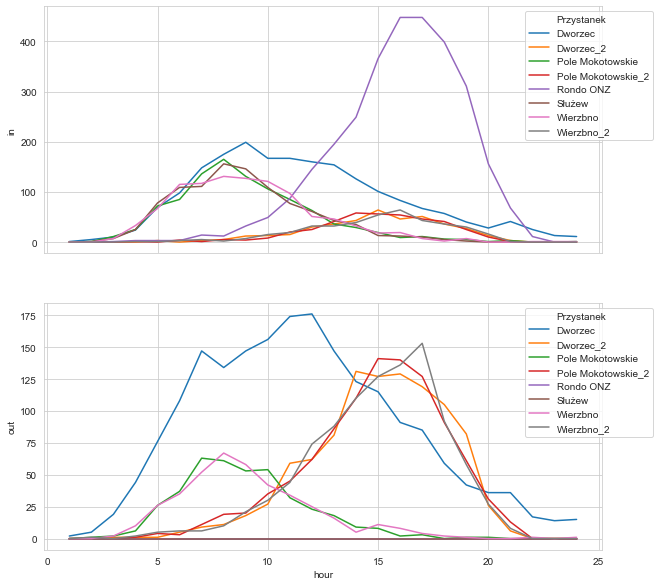

In [285]:
f, axes = plt.subplots(2, figsize=(10, 10), sharex=True)
g = sns.lineplot(data=df,x='hour',y='in',hue='Przystanek',ax=axes[0])
g.legend(bbox_to_anchor=(1.10,1))
gg = sns.lineplot(data=df,x='hour',y='out',hue='Przystanek',ax=axes[1])
gg.legend(bbox_to_anchor=(1.10,1))
plt.show()